In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import functions as f
%load_ext autoreload

file = Path.cwd().joinpath('HW2_data.csv') # concatenates HW2_data.csv to the current folder that should be the extracted zip folder 
dataset = pd.read_csv(file)  # load the data and drop the first row that was filled with nans
features = ['Age', 'Gender', 'Increased Urination', 'Increased Thirst','Sudden Weight Loss',
                       'Weakness','Increased Hunger','Genital Thrush','Visual Blurring','Itching','Irritability',
                       'Delayed Healing','Partial Paresis','Muscle Stiffness','Hair Loss','Obesity','Diagnosis','Family History']

random.seed(149) #our random seed
dataset.head(10) #visualise file

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,Male,No,No,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,Negative,0
1,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative,0
2,45,Male,Yes,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,Positive,0
3,59,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive,1
4,40,Female,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Positive,0
5,72,Male,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative,0
6,43,Male,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Negative,1
7,57,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,No,Positive,0
8,37,Male,No,No,No,Yes,No,No,No,No,No,Yes,No,No,Yes,No,Positive,1
9,56,Male,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Positive,1


In [2]:
dataset = dataset.interpolate()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  565 non-null    int64 
 1   Gender               565 non-null    object
 2   Increased Urination  565 non-null    object
 3   Increased Thirst     545 non-null    object
 4   Sudden Weight Loss   556 non-null    object
 5   Weakness             565 non-null    object
 6   Increased Hunger     552 non-null    object
 7   Genital Thrush       551 non-null    object
 8   Visual Blurring      565 non-null    object
 9   Itching              554 non-null    object
 10  Irritability         565 non-null    object
 11  Delayed Healing      565 non-null    object
 12  Partial Paresis      565 non-null    object
 13  Muscle Stiffness     550 non-null    object
 14  Hair Loss            565 non-null    object
 15  Obesity              565 non-null    object
 16  Diagnosi

In [3]:
def make_data_binary(data):
    binary = data.copy()
    ''' 
    We have changed the values from string to the binary ones, it will be easier for us 
    to work with the data.
    Female = 0, Male = 1.
    Yes = 1, No = 0
    Positive = 1, Negative = 0
    '''
    binary = binary.replace('Female',0).replace('Male',1).replace('No',0).replace('Yes',1).replace('Positive',1).replace('Negative',0)
    return binary.replace(np.nan, np.random.choice([0,1])) #we see in the data we have nan values. We have dropped them.

data = make_data_binary(dataset)
diag_state = data[["Diagnosis"]]
data.head(10) #visualize data after binarization

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,1,0,0.0,0.0,1,0.0,0.0,0,1.0,0,0,1,0.0,1,0,0,0
1,42,1,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0.0,1,0,0,0
2,45,1,1,1.0,0.0,1,0.0,1.0,0,0.0,0,1,0,0.0,1,0,1,0
3,59,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0.0,0,0,1,1
4,40,0,1,1.0,1.0,1,0.0,0.0,1,1.0,0,0,1,1.0,0,0,1,0
5,72,1,1,0.0,0.0,0,1.0,0.0,1,1.0,0,1,1,1.0,1,0,0,0
6,43,1,0,0.0,0.0,1,0.0,1.0,0,1.0,0,1,0,0.0,1,0,0,1
7,57,1,1,1.0,1.0,1,1.0,0.0,1,0.0,0,0,1,0.0,0,0,1,0
8,37,1,0,0.0,0.0,1,0.0,0.0,0,0.0,0,1,0,0.0,1,0,1,1
9,56,1,1,0.0,1.0,1,0.0,1.0,0,1.0,1,0,0,0.0,1,0,1,1


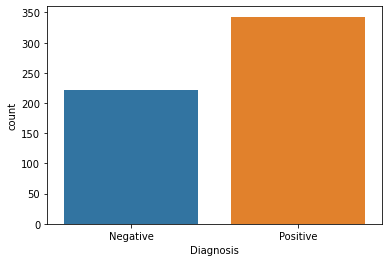

Negative samples account for 39.29% of the data.
Positive samples account for 60.71% of the data.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.countplot(x = 'Diagnosis', data = diag_state)
g.set(xticklabels=['Negative','Positive'])
plt.show()
idx_1 = (diag_state == 1).index[(diag_state == 1)['Diagnosis'] == True].tolist() # positive
idx_2 = (diag_state == 0).index[(diag_state == 0)['Diagnosis'] == True].tolist() # negative
print("Negative samples account for " + str("{0:.2f}".format(100 * len(idx_2) / len(diag_state))) + "% of the data.")
print("Positive samples account for " + str("{0:.2f}".format(100 * len(idx_1) / len(diag_state))) + "% of the data.")

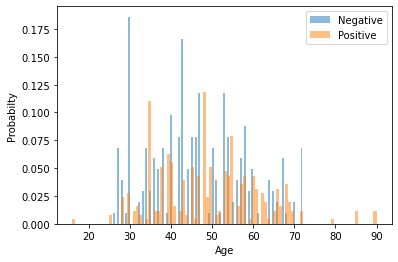

In [5]:
bins = 100
feat = 'Age'
plt.hist(dataset[feat].loc[idx_2], bins, density=True, alpha=0.5, label='Negative')
plt.hist(dataset[feat].loc[idx_1], bins, density=True, alpha=0.5, label='Positive')
plt.xlabel('Age')
plt.ylabel('Probabilty')
plt.legend(loc='upper right')
plt.show()

C:\Users\Valeriia Kravchik\anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Valeriia Kravchik\anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Valeriia Kravchik\anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

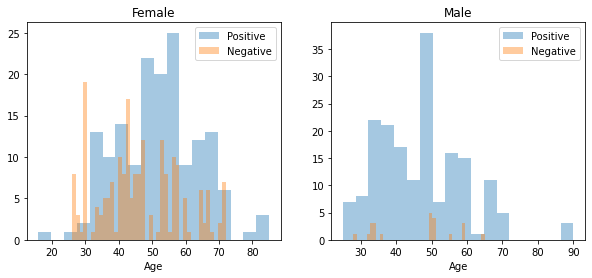

In [6]:
Positive = 'Positive'
Negative = 'Negative'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data[data['Gender']==1]
men = data[data['Gender']==0]
ax = sns.distplot(women[women['Diagnosis']==1].Age.dropna(), bins=18, label = Positive, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Diagnosis']==0].Age.dropna(), bins=40, label = Negative, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Diagnosis']==1].Age.dropna(), bins=18, label = Positive, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Diagnosis']==0].Age.dropna(), bins=40, label = Negative, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

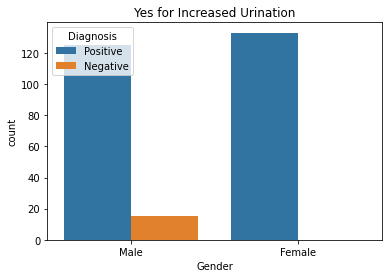

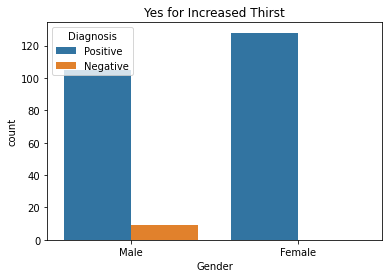

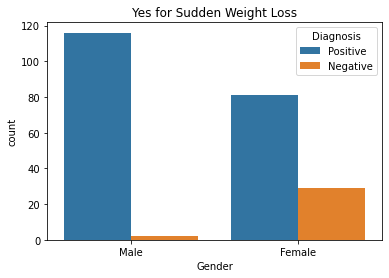

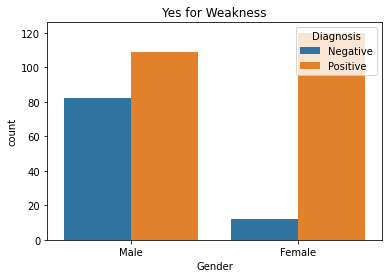

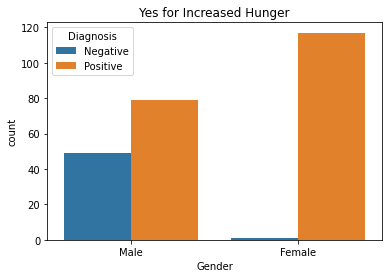

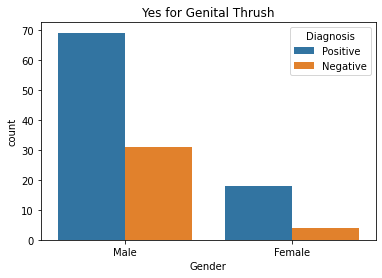

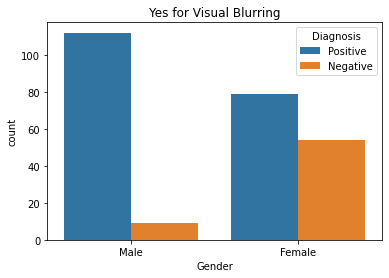

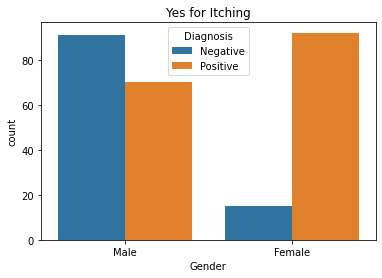

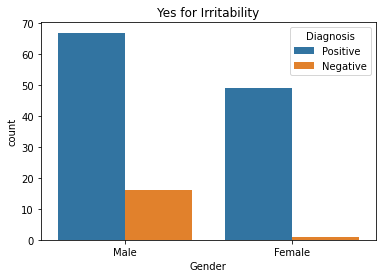

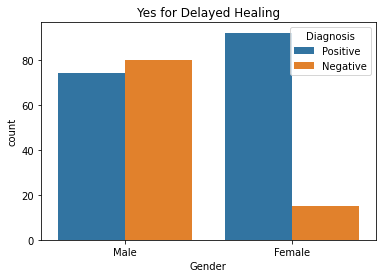

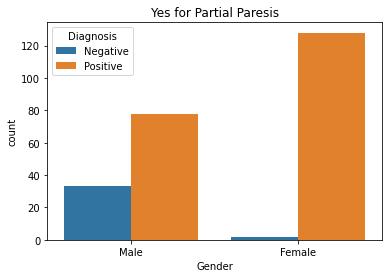

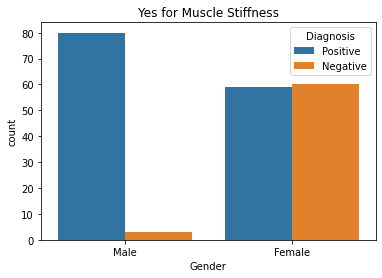

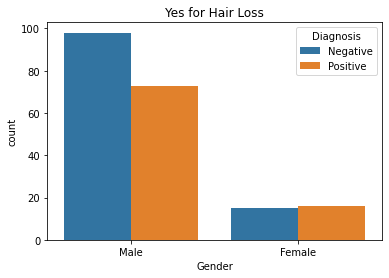

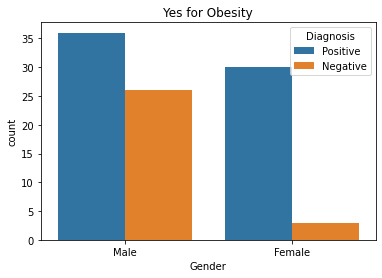

In [7]:
for i in dataset.keys():
    if i == 'Age' or i == 'Gender' or i =='Diagnosis' or i == 'Family History': 
        continue
    g = sns.countplot(x = 'Gender', hue= 'Diagnosis', data = dataset[dataset[i] == 'Yes'])
    g.set(xticklabels=['Male','Female'])
    plt.title('Yes for {}'. format(i))
    plt.show()

C:\Users\Valeriia Kravchik\anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


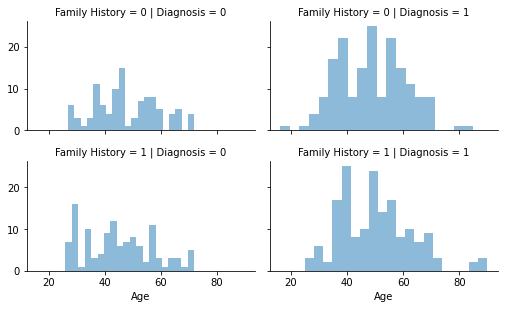

In [8]:
grid = sns.FacetGrid(data, col='Diagnosis', row='Family History', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [9]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

orig_feat = data.columns.values.tolist()
orig_feat.remove('Diagnosis')
X_train, X_test, y_train, y_test = train_test_split(data, np.ravel(diag_state), test_size=0.2, random_state=10, stratify=np.ravel(diag_state))
                                              

In [10]:
percent_train,feat = f.find_distribution(X_train,features)
percent_test,_ = f.find_distribution(X_test,features)
delta = -(percent_test-percent_train)
a = np.array([percent_train,percent_test,delta]).T

distribution = pd.DataFrame(a,columns = ['Train%','Test%','Delta%'], index = feat )
distribution.head(16)

,Train%,Test%,Delta%
Gender,62.610619,68.141593,-5.530973
Increased Urination,48.451327,47.787611,0.663717
Increased Thirst,42.699115,43.362832,-0.663717
Sudden Weight Loss,40.265487,40.707965,-0.442478
Weakness,55.752212,62.831858,-7.079646
Increased Hunger,43.141593,45.132743,-1.991150
Genital Thrush,20.353982,26.548673,-6.194690
Visual Blurring,44.247788,47.787611,-3.539823
Itching,46.460177,51.327434,-4.867257
Irritability,22.566372,27.433628,-4.867257


In [11]:
# Categorical boolean mask
categorical_feature_mask = dataset.dtypes==object 
# filter categorical columns using mask and turn it into a list
categorical_cols = dataset.dropna().columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
d = dataset.dropna().copy()
# apply le on categorical feature columns
d[categorical_cols] = d[categorical_cols].apply(lambda col: le.fit_transform(col.astype(str)))

d

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
1,42,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,45,1,1,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0
3,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,40,0,1,1,1,1,0,0,1,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,62,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0
519,35,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0
562,61,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1
563,46,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0


In [12]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
ohe = OneHotEncoder( sparse=False ) 
# categorical_features = boolean mask for categorical columns
# sparse = False output an array not sparse matrix
# apply OneHotEncoder on categorical feature columns
X_ohe = ohe.fit_transform(d.drop('Age', axis=1)) # It returns an numpy array

In [13]:
dd = dataset.dropna()['Age'].values
dd = np.reshape(dd,(1, dd.size))
X_ohe = np.concatenate((dd.T,X_ohe), axis = 1)

In [14]:
X = np.delete(X_ohe.T,32,0)

In [15]:
X1 = np.delete(X,31,0).T
Age =  X1[:,0]
mu = np.mean(Age)
std = np.std(Age)
Age -=mu
Age/=std
age = np.array([Age])
X2 = np.concatenate((age.T, X1[:,1:-1]),axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X2, d["Diagnosis"], test_size=0.2, random_state=10, stratify =d["Diagnosis"] )
logreg = LogisticRegression(solver='saga', multi_class='ovr', penalty='l2', max_iter=10000)
logreg.fit(X_train,y_train)
y_pred_log = logreg.predict(X_test)
w_log = logreg.coef_

print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_log))) + "%")
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_log, average='macro'))) + "%")                                                    

Accuracy is: 91.43%
F1 score is: 91.04%


In [17]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
val_dict_logreg = f.cv_kfold_logreg(X_train,y_train,C=C,penalty=['l1','l2'],K=5)

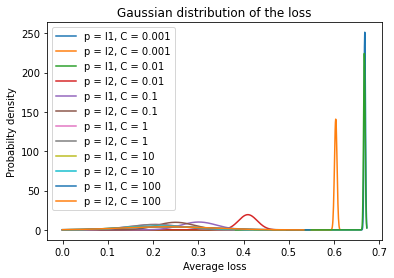

In [18]:
f.prob_curves(val_dict_logreg,flag = 'logreg')

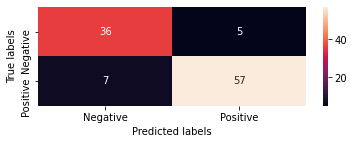

In [19]:
C =  100 #  best result
penalty =  'l1'# best result
best_logreg = LogisticRegression(solver='saga', multi_class='ovr', penalty=penalty, C=C, max_iter=10000)
best_logreg.fit(X_train,y_train)
y_pred_logreg =  best_logreg.predict(X_test)
y_pred_proba_logreg = best_logreg.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_logreg)
ax1 = plt.subplot(211)
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

In [20]:
f.calc_stat(X_test,y_test,best_logreg)

Loss is 0.27. 
Accuracy is 0.89. 
F1 is 0.90. 
AUROC is 0.955


In [21]:
# C = [0.001, 0.01, 0.1, 1, 10, 100]
C = [100]
gamma = [100]
# val_dict_linear_svm = f.cv_kfold_logreg(X_train,y_train,C=C,penalty=['-'],K=5)
y_pred_svm_lin, svm_lin = f.cv_kfold_svm(X_train,y_train,C=C,K=5,gamma=gamma,flag = 'linear')
best_svm_lin = svm_lin.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.966, test=0.866), f1=(train=0.973, test=0.894), precision=(train=0.970, test=0.884), recall=(train=0.976, test=0.905), roc_auc=(train=0.991, test=0.922), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.940, test=0.925), f1=(train=0.951, test=0.938), precision=(train=0.963, test=0.950), recall=(train=0.939, test=0.927), roc_auc=(train=0.970, test=0.980), total=   0.2s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.959, test=0.925), f1=(train=0.967, test=0.937), precision=(train=0.964, test=0.974), recall=(train=0.970, test=0.902), roc_auc=(train=0.977, test=0.942), total=   0.2s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.940, test=0.896), f1=(train=0.952, test=0.916), precision=(train=0.952, test=0.905), recall=(train=0.952, test=0.927), roc_auc=(train=0.972, test=0.986), total=   0.5s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.937, test=0.894), f1=(train=0.949, test=0.911), precision=(train=0.946, test=0.947), recall=(train=0.952, test=0.878), roc_auc=(train=0.983, test=0.974), total=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.978, test=0.940), f1=(train=0.982, test=0.951), precision=(train=0.982, test=0.951), recall=(train=0.982, test=0.951), roc_auc=(train=0.993, test=0.982), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.951, test=0.970), f1=(train=0.960, test=0.975), precision=(train=0.969, test=1.000), recall=(train=0.951, test=0.951), roc_auc=(train=0.987, test=0.994), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.985, test=0.866), f1=(train=0.988, test=0.886), precision=(train=0.988, test=0.921), recall=(train=0.988, test=0.854), roc_auc=(train=0.993, test=0.938), total=   0.0s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.963, test=0.955), f1=(train=0.969, test=0.964), precision=(train=0.981, test=0.952), recall=(train=0.957, test=0.976), roc_auc=(train=0.991, test=0.993), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.993, test=0.879), f1=(train=0.994, test=0.900), precision=(train=1.000, test=0.923), recall=(train=0.988, test=0.878), roc_auc=(train=0.992, test=0.935), total=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.959, test=0.955), f1=(train=0.967, test=0.963), precision=(train=0.964, test=0.975), recall=(train=0.970, test=0.951), roc_auc=(train=0.982, test=0.973), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.959, test=0.910), f1=(train=0.966, test=0.927), precision=(train=0.969, test=0.927), recall=(train=0.963, test=0.927), roc_auc=(train=0.989, test=0.950), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.970, test=0.925), f1=(train=0.976, test=0.940), precision=(train=0.976, test=0.929), recall=(train=0.976, test=0.951), roc_auc=(train=0.984, test=0.961), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.951, test=0.940), f1=(train=0.960, test=0.952), precision=(train=0.958, test=0.930), recall=(train=0.963, test=0.976), roc_auc=(train=0.975, test=0.985), total=   0.2s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(tra

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.955, test=0.925), f1=(train=0.964, test=0.940), precision=(train=0.964, test=0.929), recall=(train=0.964, test=0.951), roc_auc=(train=0.975, test=0.982), total=   0.3s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.963, test=0.866), f1=(train=0.970, test=0.886), precision=(train=0.959, test=0.921), recall=(train=0.982, test=0.854), roc_auc=(train=0.989, test=0.940), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.948, test=0.896), f1=(train=0.957, test=0.916), precision=(train=0.969, test=0.905), recall=(train=0.945, test=0.927), roc_auc=(train=0.979, test=0.972), total=   0.2s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.951, test=0.881), f1=(train=0.961, test=0.897), precision=(train=0.952, test=0.946), recall=(train=0.970, test=0.854), roc_auc=(train=0.980, test=0.961), total=   0.2s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.944, test=0.896), f1=(train=0.954, test=0.914), precision=(train=0.957, test=0.949), recall=(train=0.951, test=0.881), roc_auc=(train=0.982, test=0.964), total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.925, test=0.925), f1=(train=0.939, test=0.938), precision=(train=0.939, test=0.950), recall=(train=0.939, test=0.927), roc_auc=(train=0.979, test=0.993), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.970, test=0.821), f1=(train=0.976, test=0.854), precision=(train=0.976, test=0.854), recall=(train=0.976, test=0.854), roc_auc=(train=0.987, test=0.911), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.959, test=0.910), f1=(train=0.967, test=0.927), precision=(train=0.964, test=0.927), recall=(train=0.970, test=0.927), roc_auc=(train=0.980, test=0.951), total=   0.1s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.955, test=0.851), f1=(train=0.963, test=0.875), precision=(train=0.969, test=0.897), recall=(train=0.958, test=0.854), roc_auc=(train=0.984, test=0.929), total=   0.2s
[CV] svm__C=100, svm__gamma=100, svm__kernel=linear ..................
[CV]  svm__C=100, svm__gamma=100, svm__kernel=linear, accuracy=(train=0.937, test=0.955), f1=(train=0.948, test=0.965), precision=(train=0.951, test=0.953), recall=(train=0.945, test=0.976), roc_auc=(train=0.983, test=0.982), total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


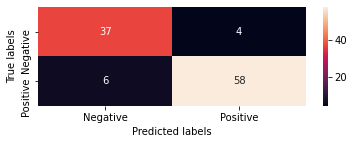

In [22]:
y_pred_svm_lin_best =  best_svm_lin.predict(X_test)
y_pred_proba_svm_lin_best = best_svm_lin.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm_lin_best)
ax1 = plt.subplot(211)
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()


In [23]:
f.calc_stat(X_test,y_test,best_svm_lin)

Loss is 0.30. 
Accuracy is 0.90. 
F1 is 0.92. 
AUROC is 0.948


In [24]:
# C = [0.001, 0.01, 0.1, 1, 10, 100]
C = [10]
gamma = [0.1]
y_pred_svm_rbf, svm_rbf = f.cv_kfold_svm(X_train,y_train,C=C,K=5,gamma=gamma, flag = 'rbf')
best_svm_rbf = svm_rbf.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, accuracy=(train=1.000, test=0.940), f1=(train=1.000, test=0.952), precision=(train=1.000, test=0.952), recall=(train=1.000, test=0.952), roc_auc=(train=1.000, test=0.991), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, accuracy=(train=0.996, test=0.925), f1=(train=0.997, test=0.938), precision=(train=1.000, test=0.950), recall=(train=0.994, test=0.927), roc_auc=(train=1.000, test=0.991), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, accuracy=(train=0.996, test=0.985), f1=(train=0.997, test=0.988), precision=(train=1.000, test=1.000), recall=(train=0.994, test=0.976), roc_auc=(train=1.000, test=0.999), total=   0.0s
[CV] svm__C=10, svm_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, accuracy=(train=0.996, test=0.970), f1=(train=0.997, test=0.975), precision=(train=1.000, test=1.000), recall=(train=0.994, test=0.951), roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, accuracy=(train=0.996, test=0.970), f1=(train=0.997, test=0.975), precision=(train=1.000, test=1.000), recall=(train=0.994, test=0.951), roc_auc=(train=1.000, test=0.999), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, accuracy=(train=0.996, test=1.000), f1=(train=0.997, test=1.000), precision=(train=1.000, test=1.000), recall=(train=0.994, test=1.000), roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, accuracy=(train=1.000, test=0

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, accuracy=(train=0.996, test=0.955), f1=(train=0.997, test=0.962), precision=(train=1.000, test=1.000), recall=(train=0.994, test=0.927), roc_auc=(train=1.000, test=0.987), total=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, accuracy=(train=0.996, test=0.985), f1=(train=0.997, test=0.988), precision=(train=0.994, test=0.976), recall=(train=1.000, test=1.000), roc_auc=(train=1.000, test=0.995), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, accuracy=(train=0.996, test=0.955), f1=(train=0.997, test=0.963), precision=(train=1.000, test=0.975), recall=(train=0.994, test=0.951), roc_auc=(train=1.000, test=0.981), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, accuracy=(train=1.000, test=0.940), f1=(train=1.000, test=0.950), precision=(train=1.000, test=0.974), recall=(train=1.000, test=0.927), roc_auc=(train=1.000, test=0.991), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, accuracy=(train=0.996, test=0.940), f1=(train=0.997, test=0.950), precision=(train=1.000, test=0.974), recall=(train=0.994, test=0.927), roc_auc=(train=1.000, test=0.992), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, accuracy=(train=0.996, test=0.985), f1=(train=0.997, test=0.988), precision=(train=1.000, test=1.000), recall=(train=0.994, test=0.976), roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=rbf ......................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=rbf, accuracy=(train=0.996, test=0

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


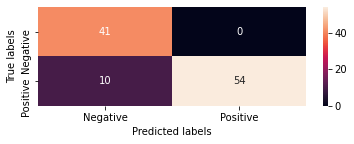

In [25]:
y_pred_svm_rbf_best =  best_svm_rbf.predict(X_test)
y_pred_proba_svm_rbf_best = best_svm_rbf.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm_rbf_best)
ax1 = plt.subplot(211)
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

In [26]:
f.calc_stat(X_test,y_test,best_svm_rbf)

Loss is 0.21. 
Accuracy is 0.90. 
F1 is 0.92. 
AUROC is 0.989


In [27]:
# C = [0.001, 0.01, 0.1, 1, 10, 100]
C = [10]
gamma = [0.1]
y_pred_svm_poly, svm_poly = f.cv_kfold_svm(X_train,y_train,C=C,K=5,gamma=gamma, flag = 'poly')
best_svm_poly = svm_poly.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, accuracy=(train=1.000, test=0.925), f1=(train=1.000, test=0.938), precision=(train=1.000, test=0.974), recall=(train=1.000, test=0.905), roc_auc=(train=1.000, test=0.984), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, accuracy=(train=0.996, test=0.925), f1=(train=0.997, test=0.938), precision=(train=1.000, test=0.950), recall=(train=0.994, test=0.927), roc_auc=(train=1.000, test=0.985), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, accuracy=(train=0.996, test=0.985), f1=(train=0.997, test=0.988), precision=(train=1.000, test=1.000), recall=(train=0.994, test=0.976), roc_auc=(train=1.000, test=0.999), total=   0.0s
[CV] svm__C=10, s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, accuracy=(train=0.996, test=0.985), f1=(train=0.997, test=0.988), precision=(train=1.000, test=1.000), recall=(train=0.994, test=0.976), roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, accuracy=(train=0.996, test=1.000), f1=(train=0.997, test=1.000), precision=(train=1.000, test=1.000), recall=(train=0.994, test=1.000), roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, accuracy=(train=1.000, test=0.939), f1=(train=1.000, test=0.951), precision=(train=1.000, test=0.951), recall=(train=1.000, test=0.951), roc_auc=(train=1.000, test=0.991), total=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, accuracy=(train=0.996, test=0.940), f1=(train=0.997, test=0.950), precision=(train=0.994, test=0.974), recall=(train=1.000, test=0.927), roc_auc=(train=1.000, test=0.996), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, accuracy=(train=0.996, test=0.925), f1=(train=0.997, test=0.937), precision=(train=1.000, test=0.974), recall=(train=0.994, test=0.902), roc_auc=(train=1.000, test=0.991), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV]  svm__C=10, svm__gamma=0.1, svm__kernel=poly, accuracy=(train=0.996, test=0.925), f1=(train=0.997, test=0.938), precision=(train=0.994, test=0.950), recall=(train=1.000, test=0.927), roc_auc=(train=1.000, test=0.981), total=   0.0s
[CV] svm__C=10, svm__gamma=0.1, svm__kernel=poly .....................
[CV] 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


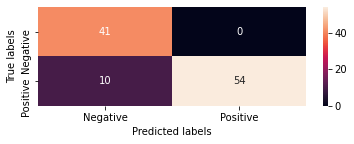

In [28]:
y_pred_svm_poly_best =  best_svm_poly.predict(X_test)
y_pred_proba_svm_poly_best = best_svm_poly.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm_poly_best)
ax1 = plt.subplot(211)
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

In [29]:
f.calc_stat(X_test,y_test,best_svm_poly)

Loss is 0.17. 
Accuracy is 0.90. 
F1 is 0.92. 
AUROC is 0.997


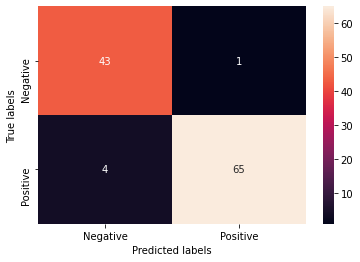

Accuracy is: 95.58%
F1 score is: 95.40%
AUC is:  99.41%


In [30]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import roc_auc_score
clf = rfc(n_estimators=10)

X_train, X_test, y_train, y_test = train_test_split(data.drop(['Diagnosis'],axis=1), np.ravel(diag_state), test_size=0.2, random_state=10, stratify = np.ravel(diag_state) )
# X_train, X_test, y_train, y_test = train_test_split(X1, d["Diagnosis"], test_size=0.2, random_state=10, stratify =d["Diagnosis"] )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba_test = clf.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
ax.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred))) + "%")
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred, average='macro'))) + "%")
print('AUC is:  ' + str("{0:.02f}".format(100*roc_auc_score(y_test, y_pred_proba_test[:, 1]))) + '%')

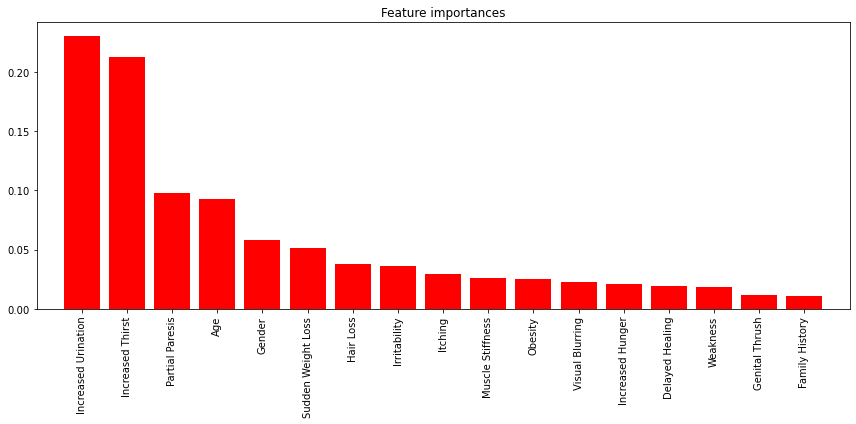

In [31]:
# print (sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), orig_feat), 
#              reverse=True))
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# for f in range(X_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
o = np.zeros(len(orig_feat)).tolist()
for i,val in enumerate(indices):
    o[i] = orig_feat[val]
plt.xticks(range(X_train.shape[1]), o)
plt.xlim([-1, X_train.shape[1]])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

(565, 2)

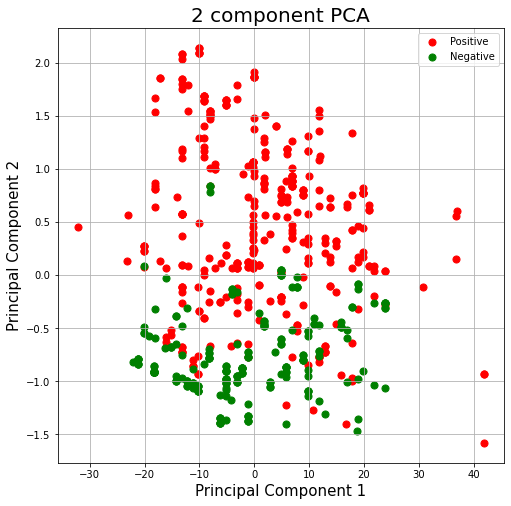

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data.drop(['Diagnosis'],axis=1))
transform_data = pca.transform(data.drop(['Diagnosis'],axis=1))
principalComponents = pca.fit_transform(data.drop(['Diagnosis'],axis=1))
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data[['Diagnosis']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Positive','Negative'])
ax.grid()
principalComponents.shape

In [41]:
from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X2, d["Diagnosis"], test_size=0.2, random_state=42,stratify = d["Diagnosis"])
log_reg = LogisticRegression()
pca = PCA(n_components=2)

pipe_pca_logreg = Pipeline(steps=[('pca', pca), ('logistic', log_reg)])
pipe_pca_logreg.fit(X_train, y_train)
y_pred_pca = pipe_pca_logreg.predict(X_test)
f.calc_stat(X_test,y_test,pipe_pca_logreg)


Loss is 0.25. 
Accuracy is 0.87. 
F1 is 0.89. 
AUROC is 0.958


In [49]:
from sklearn import svm
svm_lin = svm.SVC(probability=True,gamma='auto',kernel = 'linear')
pca = PCA(n_components=2)
pipe_pca_svm_lin = Pipeline(steps=[('pca', pca), ('svm', svm_lin)])
pipe_pca_svm_lin.fit(X_train, y_train)
y_pred_pca = pipe_pca_svm_lin.predict(X_test)
f.calc_stat(X_test,y_test,pipe_pca_svm_lin)

Loss is 0.24. 
Accuracy is 0.90. 
F1 is 0.92. 
AUROC is 0.956


In [51]:
svm_rbf = svm.SVC(probability=True,gamma='auto',kernel = 'rbf')
pca = PCA(n_components=2)
pipe_pca_svm_rbf = Pipeline(steps=[('pca', pca), ('svm', svm_rbf)])
pipe_pca_svm_rbf.fit(X_train, y_train)
y_pred_pca = pipe_pca_svm_rbf.predict(X_test)
f.calc_stat(X_test,y_test,pipe_pca_svm_rbf)

Loss is 0.24. 
Accuracy is 0.90. 
F1 is 0.91. 
AUROC is 0.957


In [53]:
svm_poly = svm.SVC(probability=True,gamma='auto',kernel = 'poly')
pca = PCA(n_components=2)
pipe_pca_svm_poly = Pipeline(steps=[('pca', pca), ('svm', svm_poly)])
pipe_pca_svm_poly.fit(X_train, y_train)
y_pred_pca = pipe_pca_svm_poly.predict(X_test)
f.calc_stat(X_test,y_test,pipe_pca_svm_poly)

Loss is 0.26. 
Accuracy is 0.90. 
F1 is 0.91. 
AUROC is 0.972


In [66]:
X3 = dataset.dropna()[['Increased Urination', 'Increased Thirst']]
X3n = pd.get_dummies(X3)
X_train, X_test, y_train, y_test = train_test_split(X3n, d['Diagnosis'], test_size=0.2, random_state=42,stratify = d['Diagnosis'])
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred_log_reg = log_reg.predict(X_test)
f.calc_stat(X_test,y_test,log_reg)

Loss is 0.29. 
Accuracy is 0.90. 
F1 is 0.91. 
AUROC is 0.918


In [67]:
svm_lin = svm.SVC(probability=True,gamma='auto',kernel = 'linear')
pipe_svm_lin = Pipeline(steps=[('svm', svm_lin)])
pipe_svm_lin.fit(X_train, y_train)
y_pred = pipe_svm_lin.predict(X_test)
f.calc_stat(X_test,y_test,pipe_svm_lin)

Loss is 0.29. 
Accuracy is 0.90. 
F1 is 0.91. 
AUROC is 0.924


In [68]:
svm_rbf = svm.SVC(probability=True,gamma='auto',kernel = 'rbf')
pipe_svm_rbf = Pipeline(steps=[ ('svm', svm_rbf)])
pipe_svm_rbf.fit(X_train, y_train)
y_pred = pipe_svm_rbf.predict(X_test)
f.calc_stat(X_test,y_test,pipe_svm_rbf)

Loss is 0.30. 
Accuracy is 0.90. 
F1 is 0.91. 
AUROC is 0.929


In [69]:
svm_poly = svm.SVC(probability=True,gamma='auto',kernel = 'poly')
pipe_svm_poly = Pipeline(steps=[('svm', svm_poly)])
pipe_svm_poly.fit(X_train, y_train)
y_pred = pipe_svm_poly.predict(X_test)
f.calc_stat(X_test,y_test,pipe_svm_poly)

Loss is 0.32. 
Accuracy is 0.90. 
F1 is 0.91. 
AUROC is 0.929


Theory Questions 

Q1: If we have unbalanced data we can get high accuracy but the other performances will be bad. For example if we have 3% pathology data samples and the classifier always returns healthy label we will get high accuracy (97%) but sensitivity, for example, will be low. 

Q2: If we chose just 2 features we have 2 options:
1) we choose the most correlated features and other not usefull for our classification we will get good performance for predicted labels, and it will be easy for computation

2) if we chose features with bad correlation (it means not usefull for classification) we will get a bad prediction results. But computation will be fast.

If we chose all the features, we have extra information that is not useful for us and make computetions slower, require a large amount of system memory and will affect the performance. 

Q3: we will prfer SVM non-linear, because if we can not distinguish the difference between pancreas biopsies from the human eye the data is not separable linearly. So we do not want to use Logistiq regression and SVM with linear kernel, due to their similarity.

Q4: SVM works well with unstructured and semi-structured data like text and images while logistic regression works with already identified independent variables. The risk of overfitting is less in SVM, while Logistic regression is vulnerable to overfitting. SVM is based on geometrical properties of the data while logistic regression is based on statistical approaches.